In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataset\\Life Expectancy Data.csv')

In [5]:
# 리포트 생성
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Life Expectancy Report", explorative=True)

# VS Code 결과창에 바로 출력
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ydata_profiling'

In [6]:
# 1. 리포트를 HTML 파일로 저장
output_file = "life_expectancy_analysis_report.html"
profile.to_file(output_file)

import os
print("-" * 50)
print(f"✅ 리포트 저장이 완료되었습니다!")
print(f"📍 저장 경로: {os.path.abspath(output_file)}")
print("-" * 50)

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

--------------------------------------------------
✅ 리포트 저장이 완료되었습니다!
📍 저장 경로: c:\Users\82102\Desktop\ml\.venv\Scripts\life_expectancy_analysis_report.html
--------------------------------------------------


In [7]:
# 0값을 가진 데이터들만 따로 확인하기
zero_income = df[df['Income composition of resources'] == 0]
print(f"0값을 가진 데이터 개수: {len(zero_income)}")
print(zero_income[['Country', 'Year', 'Life expectancy ', 'GDP']].head())

0값을 가진 데이터 개수: 130
                Country  Year  Life expectancy            GDP
74  Antigua and Barbuda  2005              74.6  11371.938950
75  Antigua and Barbuda  2004              74.4   1352.837400
76  Antigua and Barbuda  2003              74.2   9739.825560
77  Antigua and Barbuda  2002              74.0   9386.716452
78  Antigua and Barbuda  2001              73.8   9358.154162


In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# 전처리

In [6]:
# 1. 0을 NaN으로 변경
df['Income composition of resources'] = df['Income composition of resources'].replace(0, np.nan)

# 2. 국가별 중앙값으로 결측치 채우기
df['Income composition of resources'] = df.groupby('Country')['Income composition of resources'].transform(lambda x: x.fillna(x.median()))

# 3. 그래도 남은 결측치는 전체 중앙값으로 채우기
df['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].median())

c:\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python310\lib\site-packag

In [7]:
# target에 결측치가 있는 행 제거
df.dropna(subset=['Life expectancy '], inplace=True)

# 평균값 결측치 채우기
df = df.fillna(df.mean(numeric_only=True))

In [8]:
df = df.drop('Country', axis=1)

In [9]:
df['Status'] = pd.get_dummies(df['Status'],drop_first=True,dtype=int)

# 이상치 제거

In [10]:
# Status열 제외, 숫자형 열 가지고 오기
columns_for_outliers=list(df.select_dtypes(include=['number']).columns)
columns_for_outliers.remove('Status')
columns_for_outliers

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

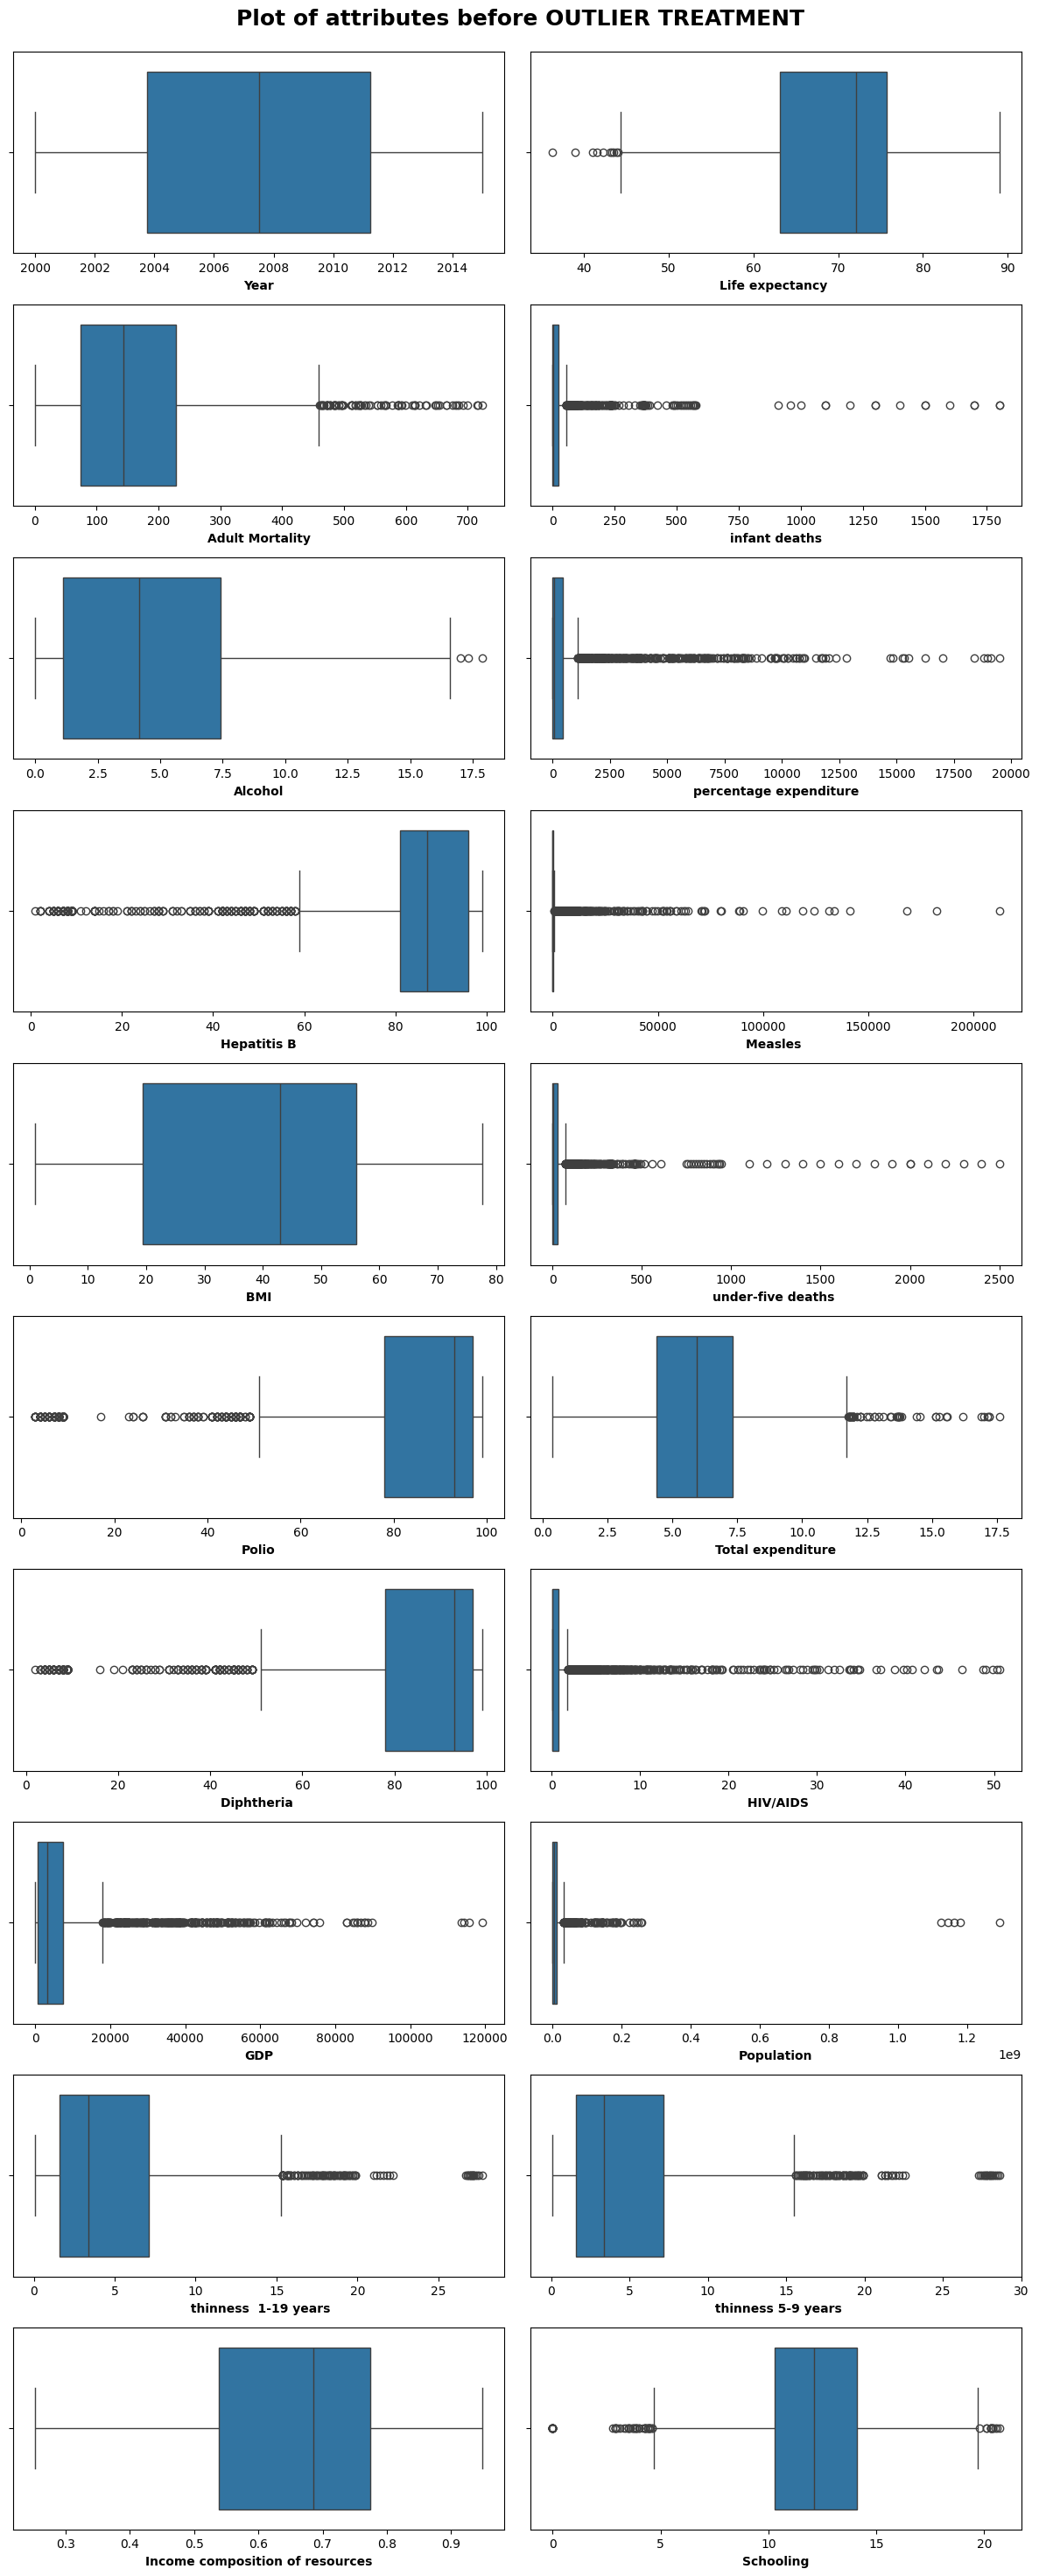

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
# 이상치 시각화
fig,axes= plt.subplots(10,2,figsize=(12,30))
axes=axes.flatten()

for i in range(len(columns_for_outliers)):
    sns.boxplot(x=df[columns_for_outliers[i]],ax=axes[i])
    axes[i].set_xlabel(columns_for_outliers[i],fontweight='bold')
plt.suptitle("Plot of attributes before OUTLIER TREATMENT\n\n",fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [12]:
# 이상치 제거
for column in columns_for_outliers:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df[column]=df[column].clip(lower_bound,upper_bound)

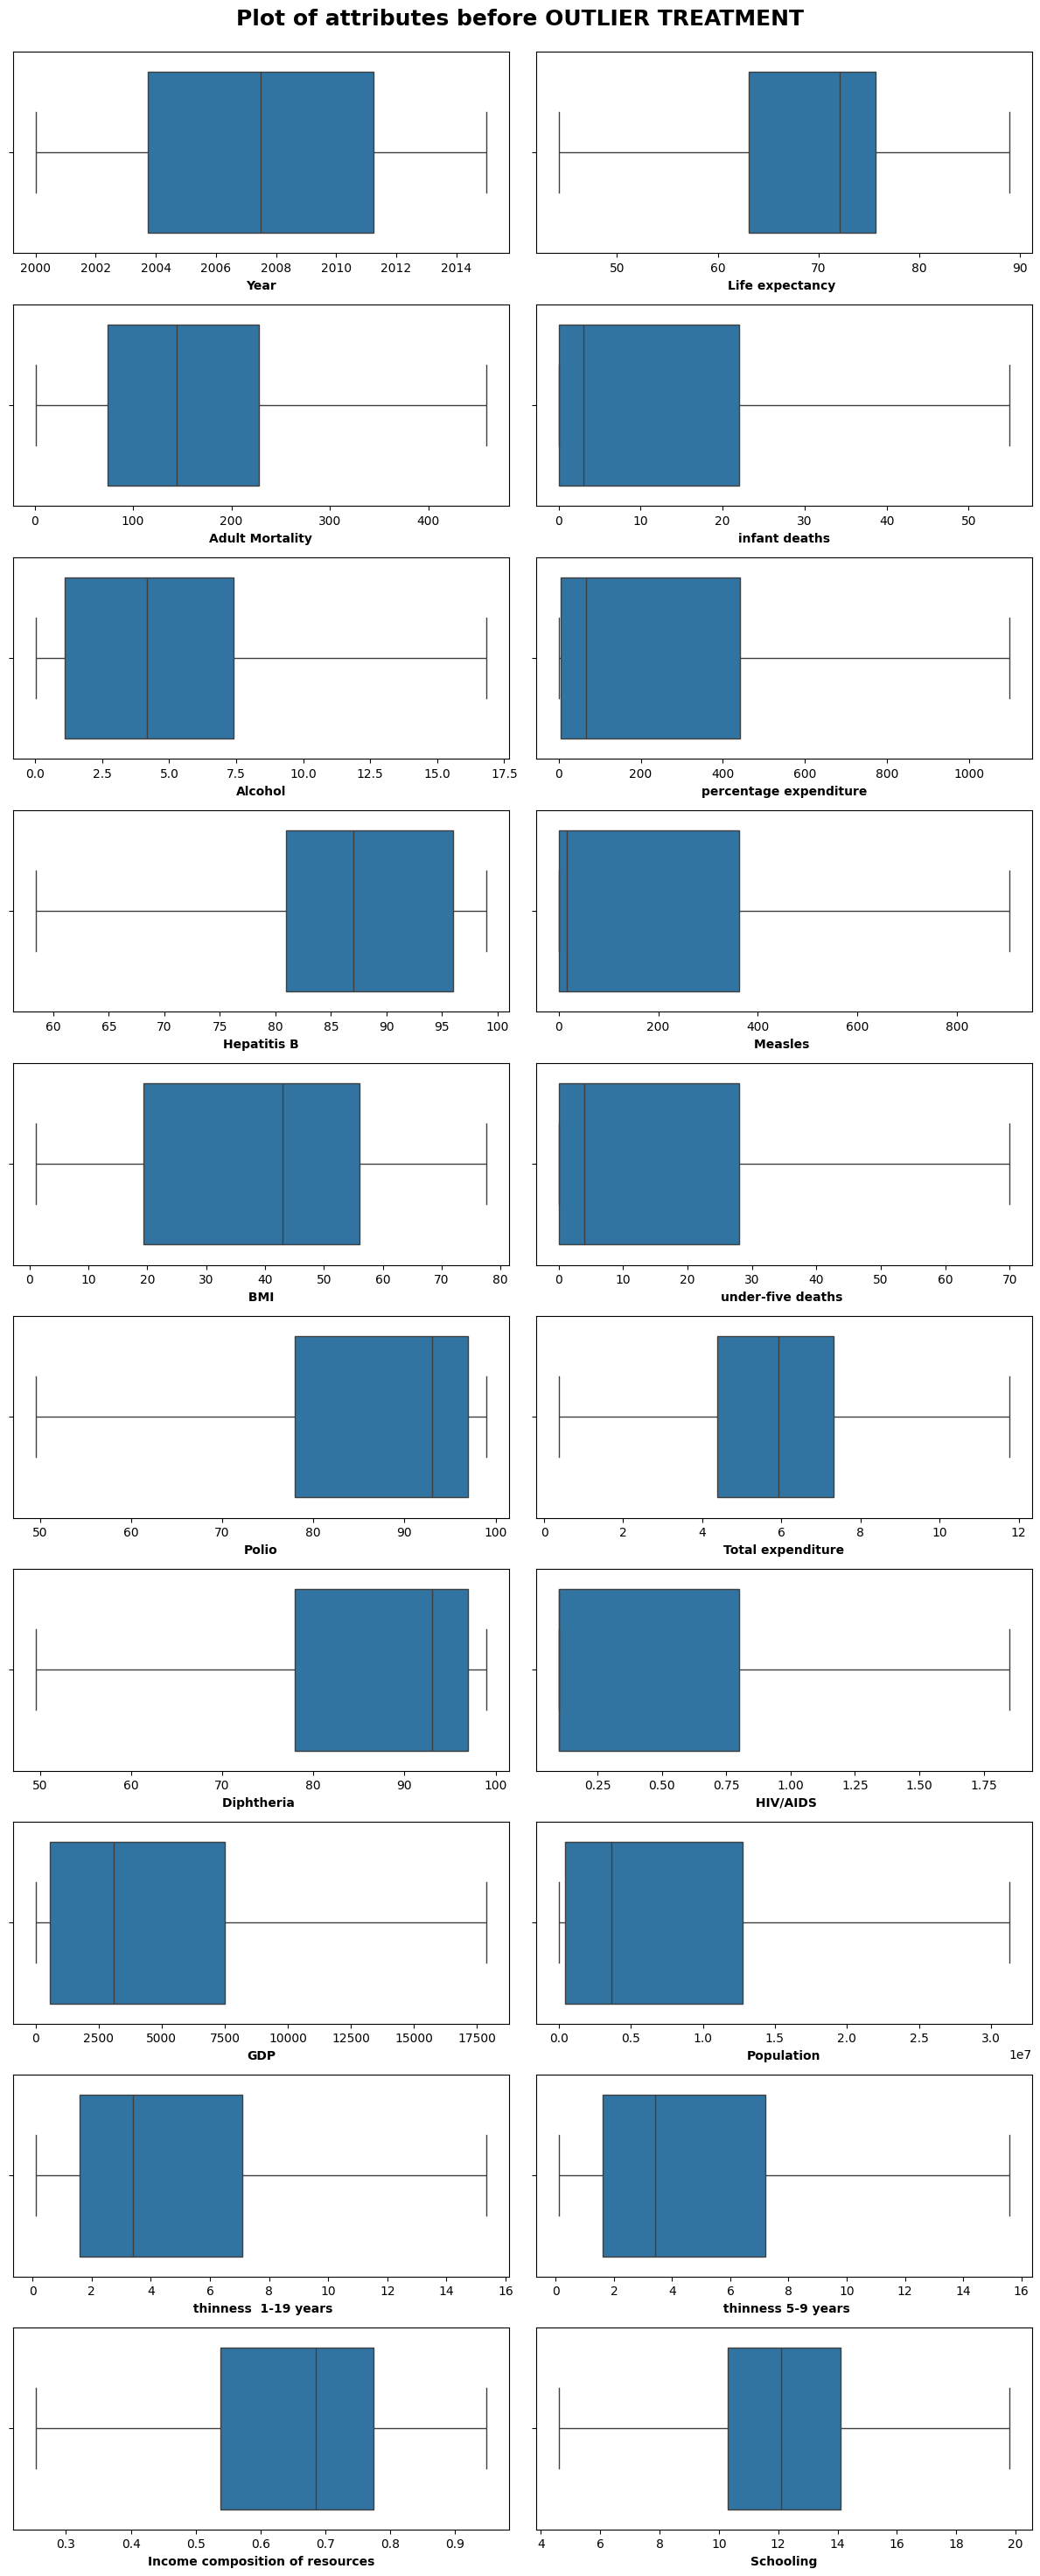

In [13]:
# 이상치 제거 후 시각화
fig,axes= plt.subplots(10,2,figsize=(12,30))
axes=axes.flatten()

for i in range(len(columns_for_outliers)):
    sns.boxplot(x=df[columns_for_outliers[i]],ax=axes[i])
    axes[i].set_xlabel(columns_for_outliers[i],fontweight='bold')
plt.suptitle("Plot of attributes before OUTLIER TREATMENT\n\n",fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [22]:
df_plot = df.copy()

# 히트맵

In [15]:
import platform

# 운영체제별 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # MacOS
    plt.rc('font', family='AppleGothic')
else: # Linux (Colab 등)
    plt.rc('font', family='NanumGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

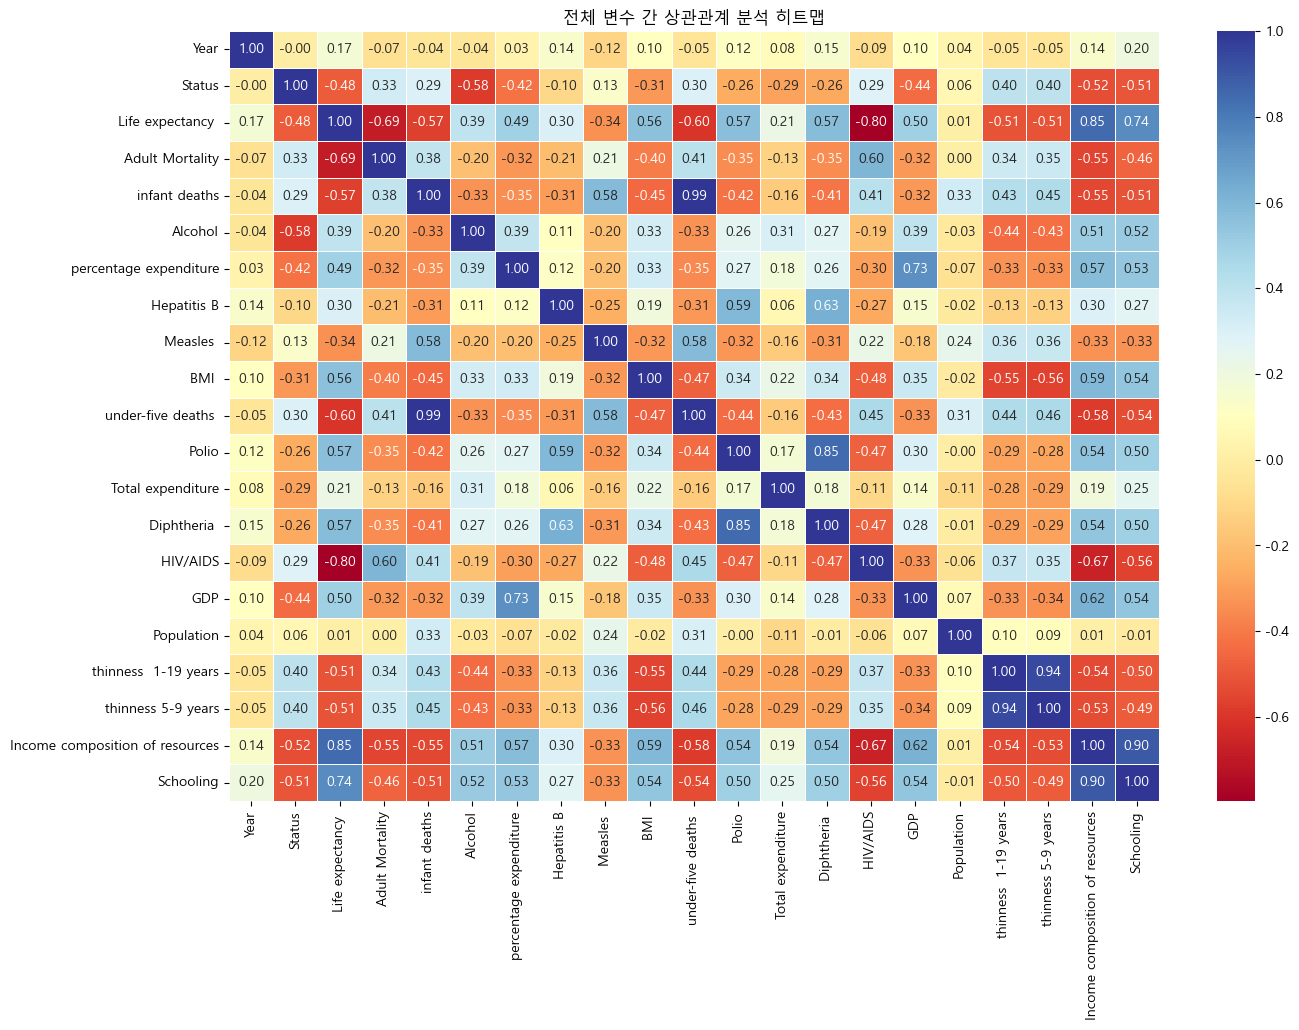

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
# 숫자로 변환된 데이터프레임의 상관계수 계산
corr = df_plot.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlBu', linewidths=0.5)
plt.title('전체 변수 간 상관관계 분석 히트맵')
plt.show()

# 로그변환

--- 각 변수별 왜도 (Skewness) ---
Population                         1.293079
infant deaths                      1.284006
percentage expenditure             1.243088
under-five deaths                  1.234535
 HIV/AIDS                          1.204141
GDP                                1.182119
Measles                            1.181978
 thinness 5-9 years                1.093203
 thinness  1-19 years              1.076662
Adult Mortality                    0.777243
Alcohol                            0.604394
Total expenditure                  0.264491
Year                               0.000000
 BMI                              -0.231828
Schooling                         -0.300539
Income composition of resources   -0.387456
Life expectancy                   -0.624228
Hepatitis B                       -0.817629
Polio                             -1.228135
Diphtheria                        -1.247082
Status                            -1.712798
dtype: float64


C:\Users\human-02\AppData\Local\Temp\ipykernel_1932\300289213.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.values, y=skewness.index, palette="pastel")


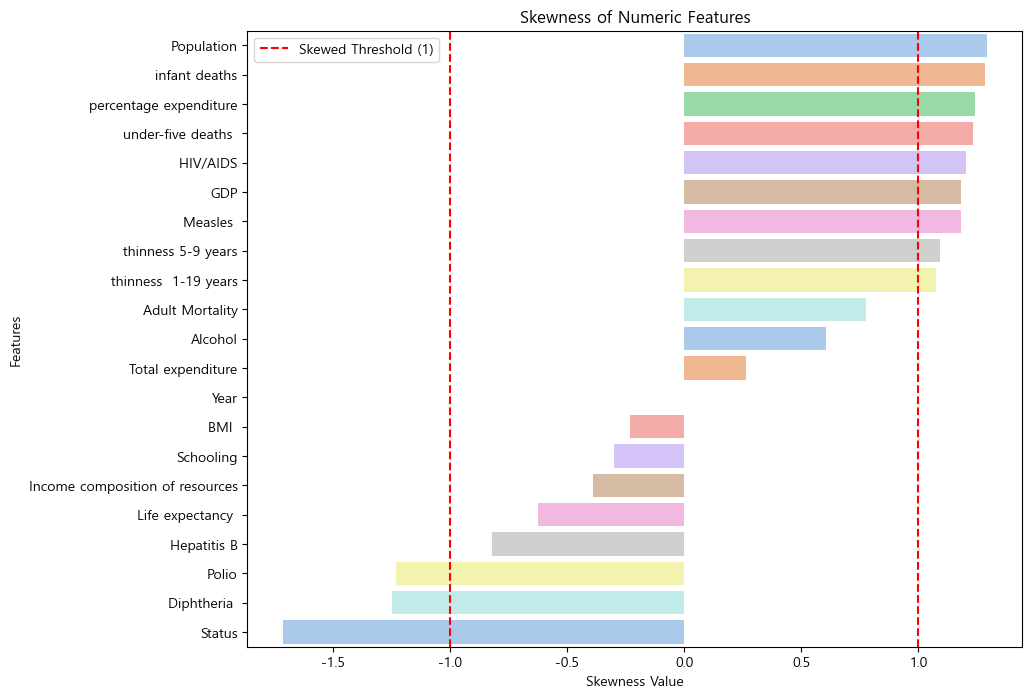

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 수치형 데이터만 선택 (문자열 컬럼 제외)
numeric_df = df_plot.select_dtypes(include=['float64', 'int64'])

# 2. 모든 수치형 변수의 왜도 계산
skewness = numeric_df.skew().sort_values(ascending=False)

# 3. 결과 출력
print("--- 각 변수별 왜도 (Skewness) ---")
print(skewness)

# 4. 왜도 시각화 (Bar plot)
plt.figure(figsize=(10, 8))
sns.barplot(x=skewness.values, y=skewness.index, palette="pastel")
plt.axvline(x=1, color='red', linestyle='--', label='Skewed Threshold (1)')
plt.axvline(x=-1, color='red', linestyle='--')
plt.title("Skewness of Numeric Features")
plt.xlabel("Skewness Value")
plt.ylabel("Features")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# 1. 수치형 컬럼만 선택
numeric_cols = df_plot.select_dtypes(include=[np.number]).columns

# 2. 각 변수의 왜도 계산
skewness = df_plot[numeric_cols].skew()

# 3. 왜도의 절대값이 1을 초과하는 변수 리스트 추출
skewed_features = skewness[abs(skewness) > 1].index

print(f"로그 변환이 적용될 변수 ({len(skewed_features)}개):")
print(list(skewed_features))

# 4. 해당 변수들에 대해 로그 변환(log1p) 적용
for col in skewed_features:
    # 0이 포함된 데이터를 위해 np.log1p 사용
    df_plot[col] = np.log1p(df_plot[col])

print("\n--- 로그 변환 완료 ---")

로그 변환이 적용될 변수 (12개):
['Status', 'infant deaths', 'percentage expenditure', 'Measles ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years']

--- 로그 변환 완료 ---


# 랜덤포레스트 튜닝

In [28]:
df_plot.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## LinearRegression

In [29]:
X = df_plot.drop(['Life expectancy '], axis=1)
y = df_plot['Life expectancy ']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_poly, y_train)

y_pred_li = model.predict(x_test_poly)

from sklearn.metrics import *
mse = mean_squared_error(y_test, y_pred_li)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('R2:', r2_score(y_test, y_pred_li))

MSE: 6.206416029249891
RMSE: 2.4912679561319555
R2: 0.9280783525022931


## RandomForest

In [30]:
X = df_plot.drop(['Life expectancy '], axis=1)
y = df_plot['Life expectancy ']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('R2:', r2_score(y_test, y_pred_rf))

MSE: 2.844472046075083
RMSE: 1.6865562682801551
R2: 0.9670374794646793


## GreadSearchCV - RandomForest

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X = df_plot.drop(['Life expectancy '], axis=1)
y = df_plot['Life expectancy ']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 1. 탐색할 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None] # 'auto'는 최신 버전에서 None과 동일
}

# 2. 랜덤 포레스트 모델 객체 생성
rf = RandomForestRegressor(random_state=42)

# 3. GridSearchCV 설정 (5-폴드 교차 검증 사용)
# -MSE 기준으로 -> MSE는 낮을수록 좋은 모델이기에 음수처리
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# 4. 학습 진행
grid_search.fit(X_train, y_train)

# 5. 최적의 파라미터와 결과 확인
print(f"최적 파라미터: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
최적 파라미터: {'max_depth': 20, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 300}


In [33]:
# 1. 최적 모델로 예측
final_pred = best_model.predict(X_test)

# 2. 성능 지표 확인
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, final_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_pred)

print(f"최적화 후 RMSE: {rmse:.4f}")
print(f"최적화 후 R2 Score: {r2:.4f}")

최적화 후 RMSE: 1.6722
최적화 후 R2 Score: 0.9676


# 주요변수 확인

C:\Users\human-02\AppData\Local\Temp\ipykernel_1932\1303685699.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


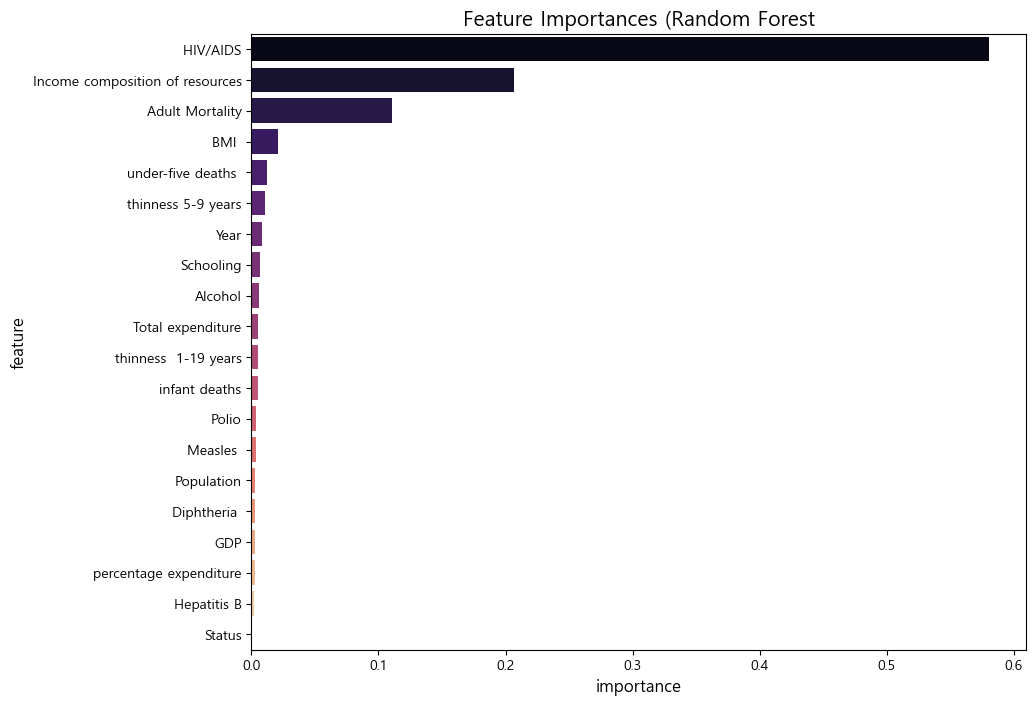

상위 5개 주요 변수:
                            Feature  Importance
13                         HIV/AIDS    0.580917
18  Income composition of resources    0.206340
2                   Adult Mortality    0.110604
8                              BMI     0.020728
9                under-five deaths     0.012645


In [34]:
# 1. 중요도 데이터프레임 만들기
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 2. 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
plt.title('Feature Importances (Random Forest', fontsize=15)
plt.xlabel('importance', fontsize=12)
plt.ylabel('feature', fontsize=12)
plt.show()

# 4. 텍스트로 출력
print("상위 5개 주요 변수:")
print(feature_importance_df.head(5))

## 주요변수 시각화

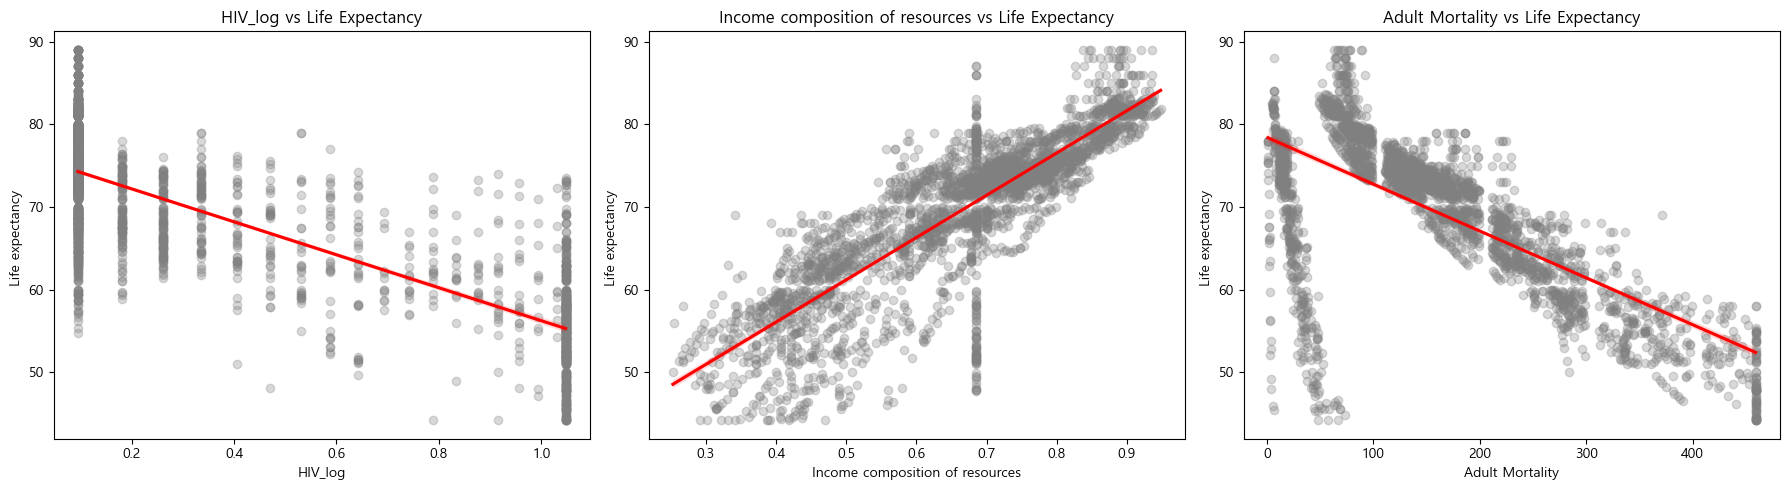

In [38]:
# 상위 3개 변수와 기대수명의 관계 시각화
top_features = feature_importance_df['Feature'].head(3).tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(top_features):
    sns.regplot(x=df_plot[col], y=df_plot['Life expectancy '], ax=axes[i],
                scatter_kws={'alpha':0.3, 'color':'gray'}, line_kws={'color':'red'})
    axes[i].set_title(f'{col} vs Life Expectancy')

plt.tight_layout()
plt.show()

## 주요변수 상위 10 개중 최적의 조합, 모델 찾기

In [37]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. 데이터 설정
# 분석에 사용하고 싶은 후보 독립변수들 리스트
all_features = ['Income composition of resources', ' HIV/AIDS', ' BMI ', 'Adult Mortality', 'under-five deaths ', 
                ' thinness 5-9 years','Schooling','Alcohol','Total expenditure',' thinness  1-19 years']
target = 'Life expectancy '

# 2. 모든 가능한 변수 조합 생성 및 테스트
best_r2 = -np.inf
best_comb = None
best_model_obj = None
best_model_name = None

# 비교할 모델 리스트
model_pool = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

print("🚀 최적의 조합을 탐색 중입니다...")

# 모든 조합 시도 (변수 1개부터 전체까지)
for r in range(1, len(all_features) + 1):
    for comb in combinations(all_features, r):
        comb = list(comb)
        X = df_plot[comb]
        y = df_plot[target]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        for name, model in model_pool.items():
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            r2 = r2_score(y_test, pred)
            
            if r2 > best_r2:
                best_r2 = r2
                best_comb = comb
                best_model_name = name
                best_model_obj = model

print("\n" + "="*50)
print(f"🏆 최적의 모델: {best_model_name}")
print(f"📊 최적의 변수 조합: {best_comb}")
print(f"📈 최고 결정계수 (R2): {best_r2:.4f}")
print("="*50)

🚀 최적의 조합을 탐색 중입니다...

🏆 최적의 모델: Random Forest
📊 최적의 변수 조합: ['Income composition of resources', ' HIV/AIDS', ' BMI ', 'Adult Mortality', 'under-five deaths ', 'Schooling', ' thinness  1-19 years']
📈 최고 결정계수 (R2): 0.9675


In [50]:
# 1. 아까 찾은 '최적의 변수 조합' 그대로 설정
#best_comb = ['Income composition of resources', 'HIV_log', ' BMI ', 'Adult Mortality', 'five deaths_log', 'Schooling', ' thinness  1-19 years']

# 2. 데이터를 해당 변수들로만 다시 구성
X_final = df_plot[best_comb]
y_final = df_plot['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# 3. 모델 생성
final_rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# 4. 최적의 변수들로만 새로 학습
final_rf_model.fit(X_train, y_train)

# 5. 이제 예측
final_pred = final_rf_model.predict(X_test)

print(f"최종 모델 학습 완료! 결정계수(R2): {r2_score(y_test, final_pred):.4f}")

최종 모델 학습 완료! 결정계수(R2): 0.9659


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# 1. K-Fold 설정 (5개)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. 교차 검증 수행 (회귀 모델이므로 scoring='r2' 사용)
cv_scores = cross_val_score(final_rf_model, X_final, y_final, cv=kf, scoring='r2')

# 3. 결과 출력
print(f"각 Fold별 R² 점수: {cv_scores}")
print(f"평균 R² 점수: {cv_scores.mean():.4f}")
print(f"R² 표준편차: {cv_scores.std():.4f}")

각 Fold별 R² 점수: [0.96677838 0.96093684 0.95326464 0.96402879 0.9646443 ]
평균 R² 점수: 0.9619
R² 표준편차: 0.0047


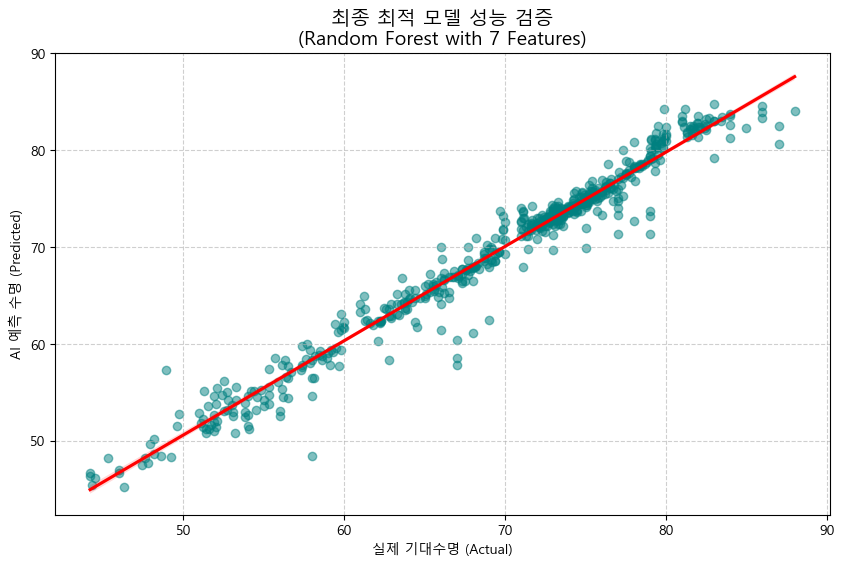

In [40]:
# 시각화: 실제값 vs 예측값
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=final_pred, scatter_kws={'alpha':0.5, 'color':'teal'}, line_kws={'color':'red'})
plt.title(f'최종 최적 모델 성능 검증\n({best_model_name} with {len(best_comb)} Features)', fontsize=14)
plt.xlabel('실제 기대수명 (Actual)')
plt.ylabel('AI 예측 수명 (Predicted)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

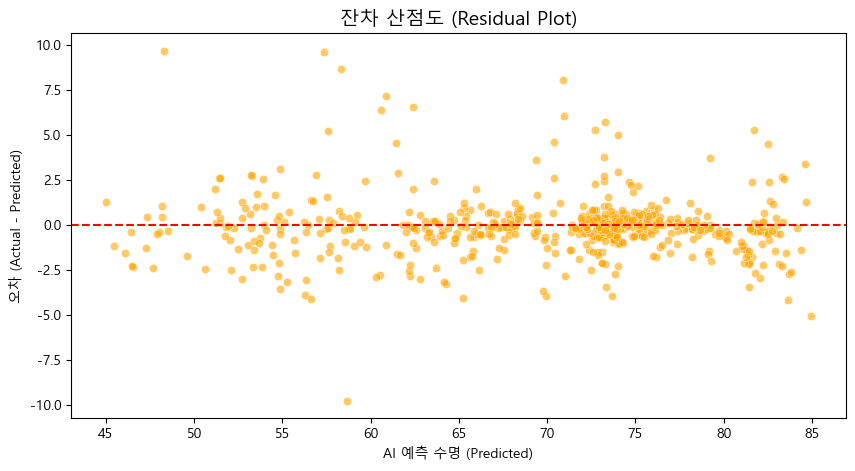

In [54]:
residuals = y_test - final_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=final_pred, y=residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--')  # 오차 0 지점 라인
plt.title('잔차 산점도 (Residual Plot)', fontsize=14)
plt.xlabel('AI 예측 수명 (Predicted)')
plt.ylabel('오차 (Actual - Predicted)')
plt.show()

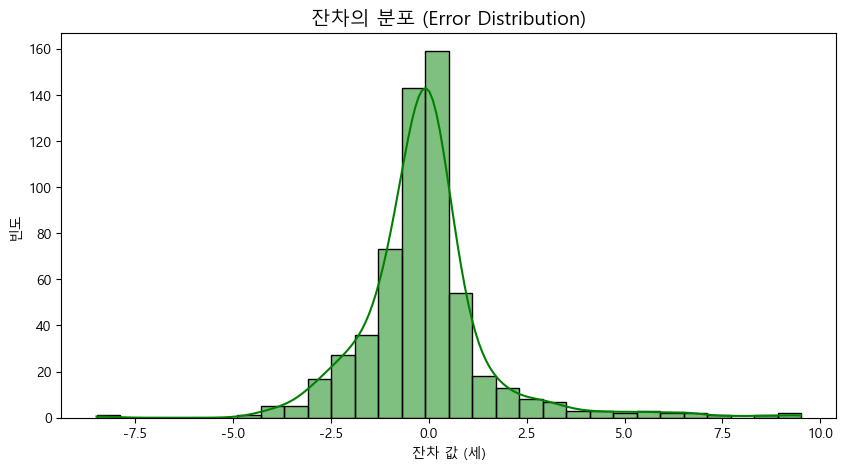

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('잔차의 분포 (Error Distribution)', fontsize=14)
plt.xlabel('잔차 값 (세)')
plt.ylabel('빈도')
plt.show()

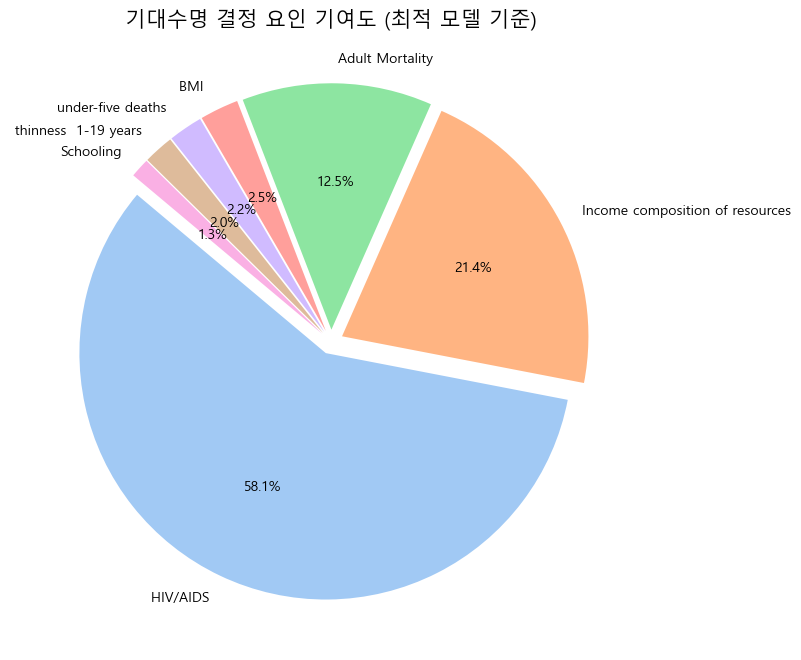

In [43]:
# 변수 중요도 추출
importances = final_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': best_comb, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'), explode=[0.05]*len(best_comb))
plt.title('기대수명 결정 요인 기여도 (최적 모델 기준)', fontsize=15)
plt.show()

In [39]:
import pickle

# 1. 저장할 데이터 구성 (모델과 변수 이름을 딕셔너리로 묶기)
model_data = {
    "model": final_rf_model,
    "features": best_comb
}

# 2. 피클 파일로 저장 (.pkl)
with open("life_expectancy_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("최적화된 모델과 변수 리스트가 'life_expectancy_model.pkl'로 저장되었습니다.")

최적화된 모델과 변수 리스트가 'life_expectancy_model.pkl'로 저장되었습니다.
